<a href="https://colab.research.google.com/github/Bingyy/MachineLearning/blob/master/%E5%9B%9E%E5%BD%92%E9%97%AE%E9%A2%98%E6%A1%88%E4%BE%8B.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# 导入必要的包
import numpy as np
import matplotlib.pyplot as plt
from pandas import read_csv
from pandas import set_option
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.metrics import mean_squared_error

In [0]:
# 导入数据
filename = 'https://archive.ics.uci.edu/ml/machine-learning-databases/housing/housing.data'
names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PRTATTO', 'B', 'LSTAT', 'MEDV' ]
data = read_csv(filename, names=names, delim_whitespace=True) # 指定文件的分隔符为空格键


In [4]:
data.shape

(506, 14)

In [5]:
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PRTATTO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [6]:
data.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PRTATTO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677082,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [8]:
# 理解数据
print(data.dtypes)

CRIM       float64
ZN         float64
INDUS      float64
CHAS         int64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD          int64
TAX        float64
PRTATTO    float64
B          float64
LSTAT      float64
MEDV       float64
dtype: object


In [9]:
#
set_option('precision', 1)
print(data.describe())

          CRIM     ZN  INDUS     CHAS    NOX     RM    AGE    DIS    RAD  \
count  5.1e+02  506.0  506.0  5.1e+02  506.0  506.0  506.0  506.0  506.0   
mean   3.6e+00   11.4   11.1  6.9e-02    0.6    6.3   68.6    3.8    9.5   
std    8.6e+00   23.3    6.9  2.5e-01    0.1    0.7   28.1    2.1    8.7   
min    6.3e-03    0.0    0.5  0.0e+00    0.4    3.6    2.9    1.1    1.0   
25%    8.2e-02    0.0    5.2  0.0e+00    0.4    5.9   45.0    2.1    4.0   
50%    2.6e-01    0.0    9.7  0.0e+00    0.5    6.2   77.5    3.2    5.0   
75%    3.7e+00   12.5   18.1  0.0e+00    0.6    6.6   94.1    5.2   24.0   
max    8.9e+01  100.0   27.7  1.0e+00    0.9    8.8  100.0   12.1   24.0   

         TAX  PRTATTO      B  LSTAT   MEDV  
count  506.0    506.0  506.0  506.0  506.0  
mean   408.2     18.5  356.7   12.7   22.5  
std    168.5      2.2   91.3    7.1    9.2  
min    187.0     12.6    0.3    1.7    5.0  
25%    279.0     17.4  375.4    6.9   17.0  
50%    330.0     19.1  391.4   11.4   21.2  


In [10]:
# 查看特征之间的两两关联关系
set_option('precision', 2)
print(data.corr(method='pearson'))

         CRIM    ZN  INDUS      CHAS   NOX    RM   AGE   DIS       RAD   TAX  \
CRIM     1.00 -0.20   0.41 -5.59e-02  0.42 -0.22  0.35 -0.38  6.26e-01  0.58   
ZN      -0.20  1.00  -0.53 -4.27e-02 -0.52  0.31 -0.57  0.66 -3.12e-01 -0.31   
INDUS    0.41 -0.53   1.00  6.29e-02  0.76 -0.39  0.64 -0.71  5.95e-01  0.72   
CHAS    -0.06 -0.04   0.06  1.00e+00  0.09  0.09  0.09 -0.10 -7.37e-03 -0.04   
NOX      0.42 -0.52   0.76  9.12e-02  1.00 -0.30  0.73 -0.77  6.11e-01  0.67   
RM      -0.22  0.31  -0.39  9.13e-02 -0.30  1.00 -0.24  0.21 -2.10e-01 -0.29   
AGE      0.35 -0.57   0.64  8.65e-02  0.73 -0.24  1.00 -0.75  4.56e-01  0.51   
DIS     -0.38  0.66  -0.71 -9.92e-02 -0.77  0.21 -0.75  1.00 -4.95e-01 -0.53   
RAD      0.63 -0.31   0.60 -7.37e-03  0.61 -0.21  0.46 -0.49  1.00e+00  0.91   
TAX      0.58 -0.31   0.72 -3.56e-02  0.67 -0.29  0.51 -0.53  9.10e-01  1.00   
PRTATTO  0.29 -0.39   0.38 -1.22e-01  0.19 -0.36  0.26 -0.23  4.65e-01  0.46   
B       -0.39  0.18  -0.36  4.88e-02 -0.

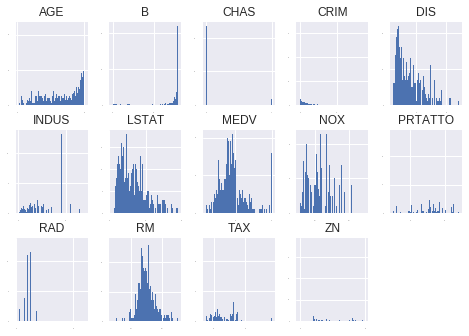

In [17]:
# 数据可视化
# 单一特征图表
data.hist(sharex=False, sharey=False, xlabelsize=1, ylabelsize=1, layout=(3,5), bins=100)
plt.show()

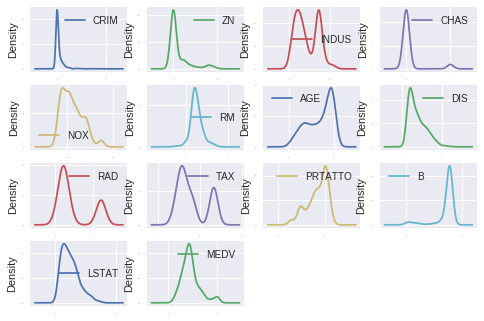

In [21]:
# 用密度图展示:更加平滑展示数据特征
data.plot(kind='density', subplots=True, layout=(4,4), sharex=False, fontsize=1)
plt.show()

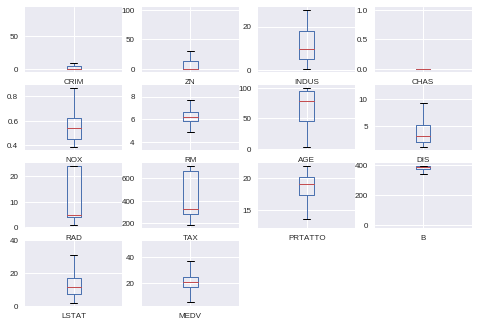

In [22]:
# 箱线图
data.plot(kind='box', subplots=True, layout=(4,4), sharex=False, sharey=False, fontsize=8)
plt.show()

### 多重数据图表

看不同数据特征之间的相互影响关系。

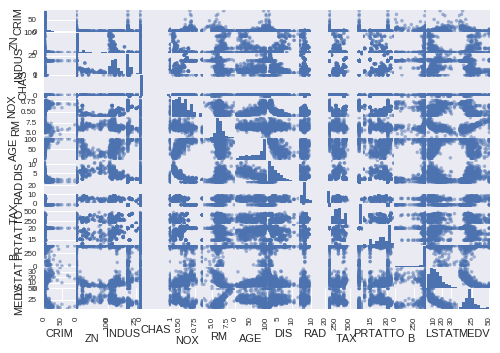

In [23]:
# 散点矩阵图
scatter_matrix(data)
plt.show()

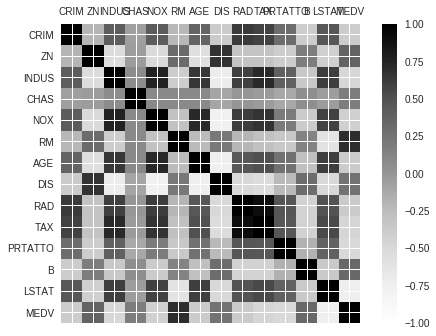

In [24]:
# 相关矩阵图

fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(data.corr(), vmin=-1, vmax=1, interpolation='none')
fig.colorbar(cax)
ticks = np.arange(0,14,1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(names)
ax.set_yticklabels(names)
plt.show()

数据集中的数据结构较复杂，需要考虑对数据进行转换，以提高模型的准确度。

- 特征选择来减少大部分相关性高的特征
- 标准化数据来降低不同数据度量单位带来的影响
- 正态化数据以降低不同的数据分布结构，提高算法的准确度

In [0]:
# 分离数据集
array = data.values
X = array[:, 0:13]
y = array[:, 13]
test_size = 0.2 # 20%测试集
seed = 7
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=seed)

In [26]:
X_train.shape

(404, 13)

In [27]:
X_test.shape

(102, 13)

In [30]:
y_train.shape, y_test.shape

((404,), (102,))

### 评估算法

从直观上看，只能得出由于部分数据的线性分布，线性回归算法和弹性网络回归算法对解决问题可能有效。且由于数据的离散化，用决策树算法或者SVM算法可能能生成高准确度的模型。

**但是我们仍然不清楚到底哪个算法能生成准确度最高的模型。**需要设计评估框架来帮助我们选择。这里用10折交叉验证来分离数据，用均方误差来比较算法准确度。其中，均方误差越趋近于0，算法的准确度就越高。

In [0]:
num_folds = 10
seed = 7
scoring = 'neg_mean_squared_error'

In [0]:
# 先不对原始数据进行任何处理，得出模型性能评价的基准
models = {}
models['LR'] = LinearRegression()
models['Lasso'] = Lasso()
models['EN'] = ElasticNet()
models['KNN'] = KNeighborsRegressor()
models['CART'] = DecisionTreeRegressor()
models['SVM'] = SVR()

In [35]:
# 直接评估算法，得出一个baseline
results = []
for key in models:
  kfold = KFold(n_splits=num_folds, random_state=seed)
  cv_result = cross_val_score(models[key], X_train, y_train, cv=kfold, scoring=scoring)
  results.append(cv_result)
  print("%s: %f (%f)" % (key, cv_result.mean(), cv_result.std()))

LR: -21.379856 (9.414264)
Lasso: -26.423561 (11.651110)
EN: -27.502259 (12.305022)
KNN: -41.896488 (13.901688)
CART: -25.028991 (12.221820)
SVM: -85.518342 (31.994798)


/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:196: FutureWarning: The default 

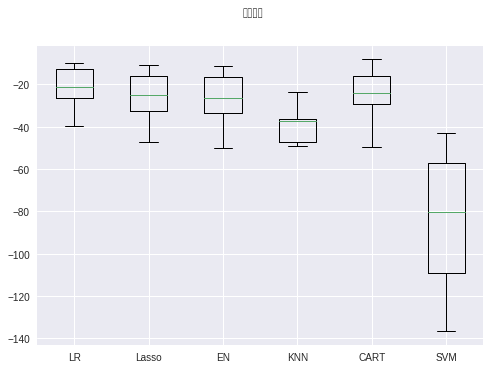

In [37]:
# 评估图——箱线图
fig = plt.figure()
fig.suptitle('算法比较')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(models.keys())
plt.show()

### 分析

线性算法的分布比较类似，K近邻算法结果分布比较紧凑。如何从箱线图上看出数据分布的优劣呢？

### 正态化数据

将数据变成中值为0，方差为1的数据。用`Pipeline`来正态化数据和对模型进行评估，可以防止数据泄露。

In [39]:
# 评估算法
pipelines = {}
pipelines['ScalerLR'] = Pipeline([('Scaler', StandardScaler()), ('LR', LinearRegression())])
pipelines['ScalerLASSO'] = Pipeline([('Scaler', StandardScaler()), ('Lasso', Lasso())])
pipelines['ScalerEN'] = Pipeline([('Scaler', StandardScaler()), ('EN', ElasticNet())])

pipelines['ScalerKNN'] = Pipeline([('Scaler', StandardScaler()), ('KNN', KNeighborsRegressor())])
pipelines['ScalerCART'] = Pipeline([('Scaler', StandardScaler()), ('CART', DecisionTreeRegressor())])
pipelines['ScalerSVM'] = Pipeline([('Scaler', StandardScaler()), ('SVM', SVR())])

results = []
for key in pipelines:
  kfold = KFold(n_splits=num_folds, random_state=seed)
  cv_result = cross_val_score(pipelines[key], X_train, y_train, cv=kfold, scoring=scoring)
  results.append(cv_result)
  print("%s: %f (%f)" % (key, cv_result.mean(), cv_result.std()))


ScalerLR: -21.379856 (9.414264)
ScalerLASSO: -26.607314 (8.978761)
ScalerEN: -27.932372 (10.587490)
ScalerKNN: -20.107620 (12.376949)
ScalerCART: -21.337874 (7.697376)
ScalerSVM: -29.633086 (17.009186)


### 分析

正则化以后，KNN算法大的MSE最优。

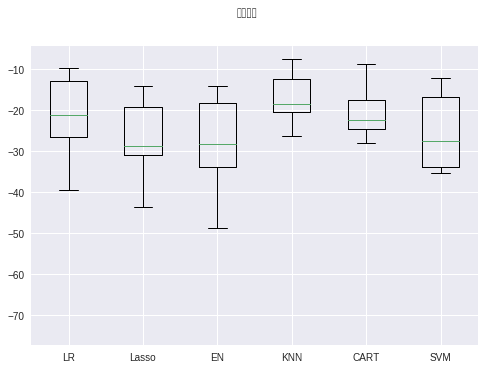

In [40]:
# 评估算法：箱线图
fig = plt.figure()
fig.suptitle('算法评估')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(models.keys())
plt.show()

In [44]:
type(results)

list

In [45]:
results[0]

array([ -9.79242784, -27.98675963, -39.57310026, -21.6483667 ,
       -19.30062302, -32.4894046 , -20.57890816,  -9.75795741,
       -21.94582648, -10.72518316])

### 开始调参

通过上面的分析我们看到KNN算法具有最好的结果，能不能更好呢？这就进入到调参的过程了，即前面学过的网格搜索和随机搜索等方法。

In [46]:
# 网格搜索
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)

# 遍历参数
param_grid = {'n_neighbors': [1,3,5,7,9,11,13,15,17,19,21]}
model = KNeighborsRegressor()
kfold = KFold(n_splits=num_folds, random_state=seed)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
grid_result = grid.fit(X=rescaledX, y=y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [47]:
print('最优： %s 使用%s' % (grid_result.best_score_, grid_result.best_params_))

最优： -18.172136963696367 使用{'n_neighbors': 3}


In [0]:
cv_results = zip(grid_result.cv_results_['mean_test_score'], grid_result.cv_results_['std_test_score'], grid_result.cv_results_['params'])

In [49]:
for mean, std, param in cv_results:
  print('%f (%f) with %r' % (mean, std, param))

-20.208663 (15.029652) with {'n_neighbors': 1}
-18.172137 (12.950570) with {'n_neighbors': 3}
-20.131163 (12.203697) with {'n_neighbors': 5}
-20.575845 (12.345886) with {'n_neighbors': 7}
-20.368264 (11.621738) with {'n_neighbors': 9}
-21.009204 (11.610012) with {'n_neighbors': 11}
-21.151809 (11.943318) with {'n_neighbors': 13}
-21.557400 (11.536339) with {'n_neighbors': 15}
-22.789938 (11.566861) with {'n_neighbors': 17}
-23.871873 (11.340389) with {'n_neighbors': 19}
-24.361362 (11.914786) with {'n_neighbors': 21}


### 集成算法

除了使用调参方法以外，还可以用集成算法提升准确率。现在对线性回归，K近邻以及回归树进行集成看看效果。

In [51]:
ensembles = {}
ensembles['ScaledAB'] = Pipeline([('Scaler', StandardScaler()), ('AB', AdaBoostRegressor())])
ensembles['ScaledAB-KNN'] = Pipeline([('Scaler', StandardScaler()), ('ABKNN', AdaBoostRegressor(base_estimator=KNeighborsRegressor(n_neighbors=3)))])
ensembles['ScaledAB-LR'] = Pipeline([('Scaler', StandardScaler()), ('ABLR', AdaBoostRegressor(LinearRegression()))])
ensembles['ScaledRFR'] = Pipeline([('Scaler', StandardScaler()), ('RFR', RandomForestRegressor())])
ensembles['ScaledETR'] = Pipeline([('Scaler', StandardScaler()), ('ETR', ExtraTreesRegressor())])
ensembles['ScaledGBR'] = Pipeline([('Scaler', StandardScaler()), ('GBR', GradientBoostingRegressor())])

results = []
for key in ensembles:
  kfold = KFold(n_splits=num_folds, random_state=seed)
  cv_result = cross_val_score(ensembles[key], X_train, y_train, cv=kfold, scoring=scoring)
  results.append(cv_result)
  print('%s: %f (%f)' % (key, cv_result.mean(), cv_result.std()))

ScaledAB: -15.313983 (6.670649)
ScaledAB-KNN: -15.983859 (10.512580)
ScaledAB-LR: -23.065245 (8.726398)


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:246: FutureWarning: The de

ScaledRFR: -13.556917 (8.504351)
ScaledETR: -10.566616 (6.419752)


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


ScaledGBR: -10.215790 (4.498119)


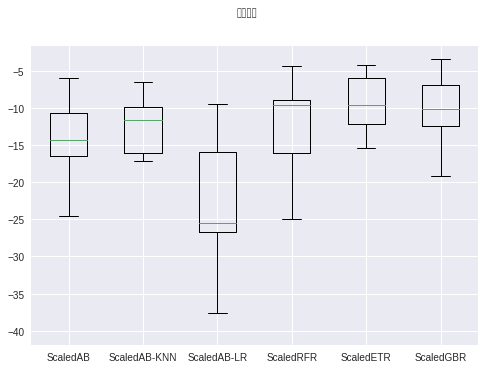

In [52]:
# 评估图——箱线图
fig = plt.figure()
fig.suptitle('算法比较')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(ensembles.keys())
plt.show()


### 集成算法调参

集成算法有一个参数`n_estimators`， 这个可以调整，看看是否可以得到有提升的结果。

In [53]:
# GBM算法调参——网格搜索
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)

# 遍历参数
param_grid = {'n_estimators': [10,50,100,200,300,400,500,600,700, 800,900]}
model = GradientBoostingRegressor()
kfold = KFold(n_splits=num_folds, random_state=seed)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
grid_result = grid.fit(X=rescaledX, y=y_train)
print('最优： %s 使用%s' % (grid_result.best_score_, grid_result.best_params_))


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


最优： -9.260046598760743 使用{'n_estimators': 900}


In [54]:
# ET算法调参——网格搜索
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)

# 遍历参数
param_grid = {'n_estimators': [5, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]}
model = ExtraTreesRegressor()
kfold = KFold(n_splits=num_folds, random_state=seed)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
grid_result = grid.fit(X=rescaledX, y=y_train)
print('最优： %s 使用%s' % (grid_result.best_score_, grid_result.best_params_))

最优： -9.093159598459847 使用{'n_estimators': 30}


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


### 显示最后结果最好的是ET模型。


In [0]:
# 训练模型
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
gbr = ExtraTreesRegressor(n_estimators=30)
gbr.fit(X=rescaledX, y=y_train)

# 评估算法模型
rescaledX_test = scaler.transform(X_test)
predictions = gbr.predict(rescaledX_test)

In [56]:
type(rescaledX_test)

numpy.ndarray

In [58]:
rescaledX_test

array([[ 0.05444997, -0.48718289,  1.00484917, ...,  0.83670829,
         0.37088302,  0.0697663 ],
       [-0.41111785, -0.48718289, -0.84021143, ...,  0.83670829,
         0.41073902, -0.30310621],
       [-0.38544347, -0.48718289, -0.52722284, ...,  0.55982352,
         0.4347445 ,  0.00372246],
       ...,
       [-0.40981109,  0.58226879, -0.88737409, ...,  0.28293876,
         0.4347445 , -1.02821253],
       [ 0.24844499, -0.48718289,  1.00484917, ...,  0.83670829,
        -0.04318293,  0.68342364],
       [-0.33291961, -0.48718289, -0.41860579, ...,  1.20588797,
         0.2047972 ,  0.28165695]])

In [60]:
print(mean_squared_error(y_test, predictions)) # 最后求出军方误差，结果还不错

14.653818518518516
